# <center> **Morfología Matemática II** </center>
## <font size=4> **Visión por Computadora 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import skimage as ski
from skimage.filters import thresholding as th

from skimage import morphology as mo
from scipy import ndimage as ndi

In [2]:
def cross(r=2):
    x = np.zeros((r,r)).astype(int)
    x[:,r//2] = 1
    x[r//2,:] = 1
    x = np.pad(x, [1,1])
    return x

# Thinning

In [3]:
I = plt.imread('circles.png')

In [4]:
I = ski.color.rgb2gray(I[:,:,:3])
I.shape

(256, 256)

In [5]:
T = mo.thin(I)

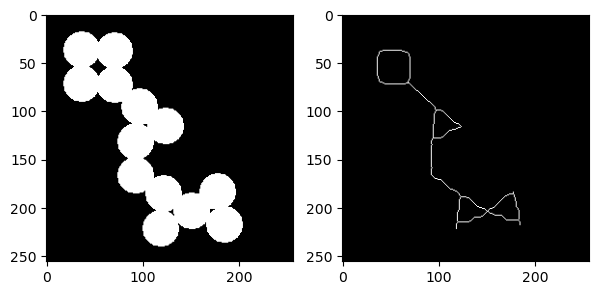

In [6]:
plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.imshow(I, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(T, cmap='gray')
plt.show()

# Connected Components (Algoritmo de Doble Pasada)

In [7]:
I = plt.imread('octagons.png')
I.shape

(341, 342, 4)

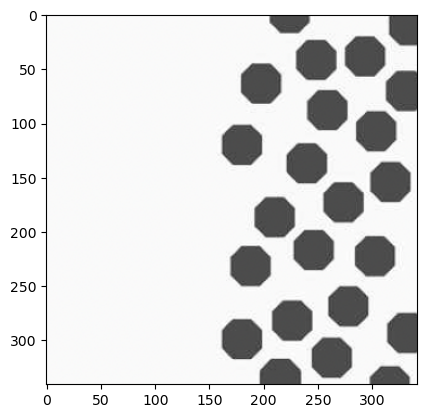

In [8]:
plt.figure()
plt.imshow(I, cmap='gray')
plt.show()

In [9]:
I = ski.color.rgb2gray(I[:,:,:3])
I.shape

(341, 342)

In [10]:
print(I.min(), I.max())

0.16050157 0.99999994


In [11]:
th = 180/255

In [12]:
J = np.zeros(I.shape).astype(int)
J[I >= th] = 0
J[I < th] = 1

In [13]:
O = mo.opening(J, mo.disk(5))

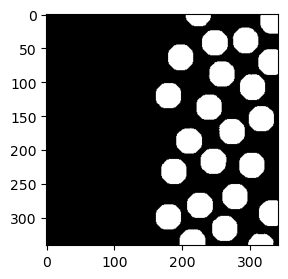

In [14]:
plt.figure(figsize=(3,3))
plt.imshow(O, cmap='gray')
plt.show()

In [15]:
C, M = mo.label(O, background=0, return_num=True, connectivity=2)

In [16]:
print(C.shape)

(341, 342)


In [17]:
print(C.min(), C.max())

0 23


In [18]:
C

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
print(M)

23


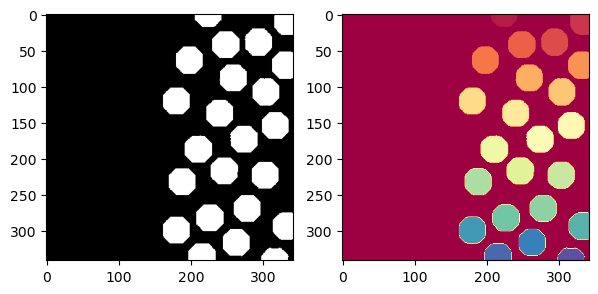

In [20]:
plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.imshow(J, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(C, plt.cm.Spectral)
plt.show()

In [21]:
C[40:60, 260:280]

array([[4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 4, 4, 4, 0, 0, 0, 0, 0,

# Hit or Miss

In [22]:
I = plt.imread('text.png')
I.shape

(342, 748, 4)

In [23]:
I = ski.color.rgb2gray(I[:,:,:3])
I.shape

(342, 748)

In [24]:
print(I.min(), I.max())

0.0 0.85882354


In [25]:
I = 1. - I

In [26]:
J = I.copy()

th = 180/255
J[I >= th] = 1
J[I < th] = 0
J = J.astype(np.uint8)

In [27]:
se1 = J[78:96, 47:57]  # letra t
se1.shape

(18, 10)

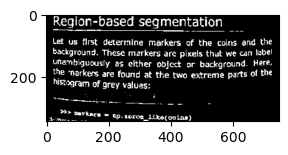

In [28]:
plt.figure(figsize=(3,3))
plt.imshow(J, cmap='gray')
plt.show()

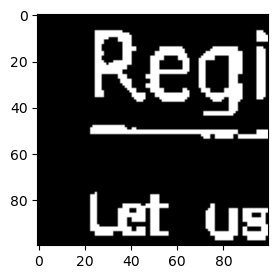

In [29]:
plt.figure(figsize=(3,3))
plt.imshow(J[:100, :100], cmap='gray')
plt.show()

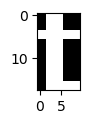

In [30]:
plt.figure(figsize=(1,1))
plt.imshow(se1, cmap='gray')
plt.show()

In [31]:
H = ndi.binary_hit_or_miss(J, se1).astype(np.uint8)

In [32]:
H.shape

(342, 748)

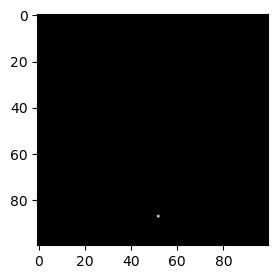

In [33]:
plt.figure(figsize=(3,3))
plt.imshow(H[:100, :100], cmap='gray')
plt.show()

In [34]:
H.max()

1

In [35]:
pix = np.argwhere(H == 1).reshape(-1,2)
pix

array([[87, 52]])

In [36]:
H2 = H.copy()
for [i,j] in pix:
    H2[i-9:i+9, j-5:j+5] = se1

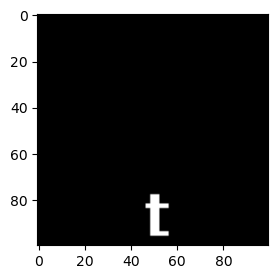

In [37]:
plt.figure(figsize=(3,3))
plt.imshow(H2[:100, :100], cmap='gray')
plt.show()

In [38]:
H3 = (J + H2).astype(np.uint8)

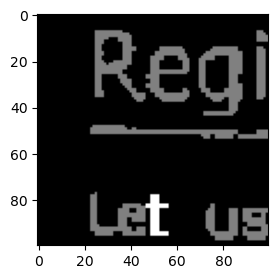

In [39]:
plt.figure(figsize=(3,3))
plt.imshow(H3[:100, :100], cmap='gray')
plt.show()

# Hit or Miss (Ejemplo 2)

In [40]:
I = plt.imread('text2.png')
I.shape

(220, 540, 4)

In [41]:
I = ski.color.rgb2gray(I[:,:,:3])
I.shape

(220, 540)

In [42]:
print(I.min(), I.max())

0.12042981 0.99999994


In [43]:
I = 1. - I

In [44]:
J = I.copy()

th = 180/255
J[I >= th] = 1
J[I < th] = 0
J = J.astype(np.uint8)

In [45]:
se1 = J[47:64, 67:82]  # letra n
se1.shape

(17, 15)

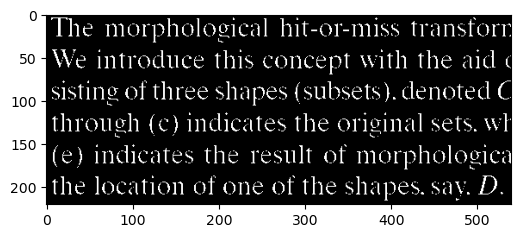

In [46]:
plt.figure(figsize=(6,6))
plt.imshow(J, cmap='gray')
plt.show()

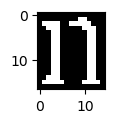

In [47]:
plt.figure(figsize=(1,1))
plt.imshow(se1, cmap='gray')
plt.show()

In [48]:
H = ndi.binary_hit_or_miss(J, se1).astype(np.uint8)

In [49]:
H.shape

(220, 540)

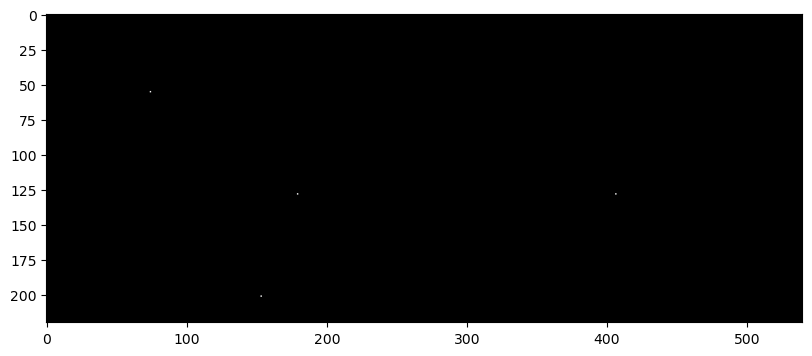

In [50]:
plt.figure(figsize=(10,4))
plt.imshow(H, cmap='gray')
plt.show()

In [51]:
pix = np.argwhere(H == 1).reshape(-1,2)
pix

array([[ 55,  74],
       [128, 179],
       [128, 406],
       [201, 153]])

In [52]:
H2 = H.copy()
u, v = se1.shape
for [i,j] in pix:
    H2[i-u//2:i+u//2+1, j-v//2:j+v//2+1] = se1

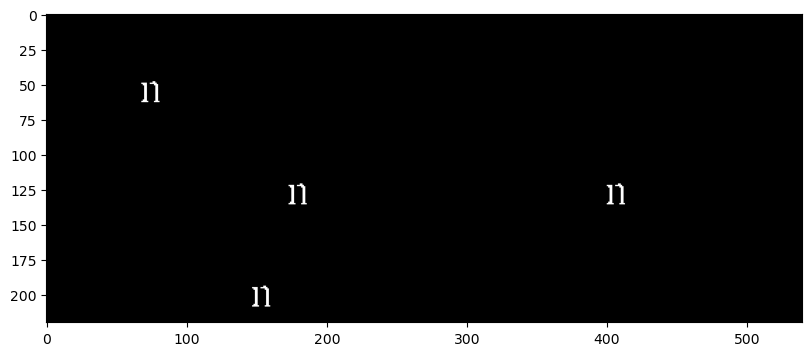

In [53]:
plt.figure(figsize=(10,4))
plt.imshow(H2, cmap='gray')
plt.show()

In [54]:
H3 = (J + H2).astype(np.uint8)

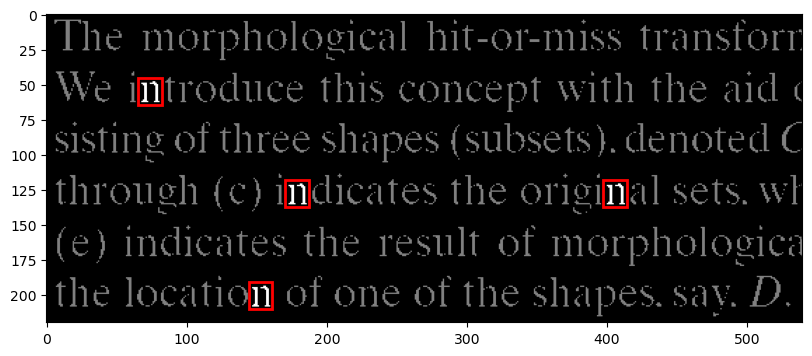

In [55]:
plt.figure(figsize=(10,4))
plt.imshow(H3, cmap='gray')
for (i,j) in pix:
    plt.gca().add_patch(Rectangle((j-v//2-2,i-u//2-2),v+2,u+2, linewidth=2, edgecolor='r', facecolor='none'))
plt.show()